## Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


## Datos

Datos completos normalizados:



In [22]:
datos = pd.read_csv("predictores_train_VIF_NORM.csv") 

In [3]:
dat_y_train = datos.loc[:,datos.columns == "carga_aprobada"]
dat_x_train = datos.loc[:, datos.columns != 'carga_aprobada']

Conjunto de entrenamiento y prueba:

In [4]:
train = pd.read_csv("train_norm.csv", encoding = "latin-1") 

In [5]:
y_train2 = train.loc[:,train.columns == "carga_aprobada"]
x_train2 = train.loc[:, train.columns != 'carga_aprobada']

In [6]:
test = pd.read_csv("test_norm.csv", encoding = "latin-1") 

In [7]:
y_test2 = test.loc[:,test.columns == "carga_aprobada"]
x_test2 = test.loc[:, test.columns != 'carga_aprobada']

## red neuronal 1

A continuación, se realiza la primera red neuonal. En donde no existen capas ocultas, simplemente las variables de entrada están conectadas directamente a la última capa. 

In [8]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(18, 16))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

In [9]:
def plot_confusion_matrix(model, X, y):
    #y_pred = model.predict_classes(X, verbose=0)
    y_pred =  (model.predict(X) > 0.5).astype("int32")
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(x_train2.shape[1],), activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
history = model.fit(x=x_train2, y=y_train2, verbose=0, epochs=20, validation_split=0.2)

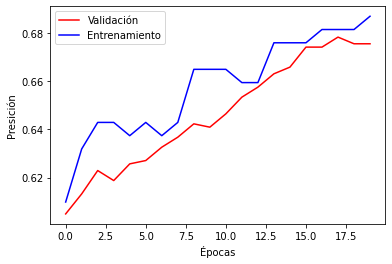

In [ ]:
#plot_loss_accuracy(history)
plt.plot(range(20), history.history["accuracy"], "r", label="Validación")
plt.plot(range(20), history.history["val_accuracy"], "b", label = "Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Presición")
plt.legend()
plt.show()

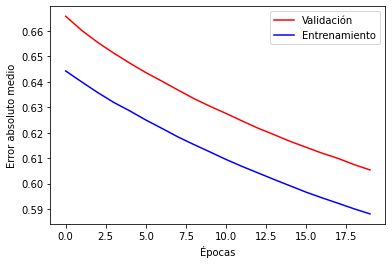

In [ ]:
#plot_loss_accuracy(history)
plt.plot(range(20), history.history["loss"], "r", label="Validación")
plt.plot(range(20), history.history["val_loss"], "b", label = "Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Error absoluto medio")
plt.legend()
plt.show()

13/13 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       240
           1       0.68      0.64      0.66       149

    accuracy                           0.75       389
   macro avg       0.73      0.73      0.73       389
weighted avg       0.75      0.75      0.75       389

13/13 [==============================] - 0s 1ms/step


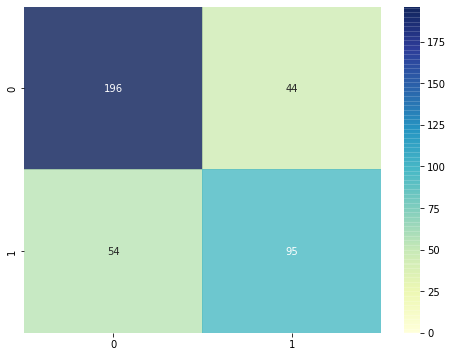

In [ ]:
y_pred =  (model.predict(x_test2) > 0.5).astype("int32")
print(classification_report(y_test2, y_pred))

plot_confusion_matrix(model, x_test2, y_test2) 

In [ ]:
y_pred[4]

array([0], dtype=int32)

## red Neuronal 2

In [ ]:
from keras.optimizers import Adam

In [ ]:
model2 = Sequential()
model2.add(Dense(16, input_shape=(x_train2.shape[1],), activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(optimizer= "Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x=x_train2, y=y_train2, verbose=0, epochs=30, validation_split=0.2)

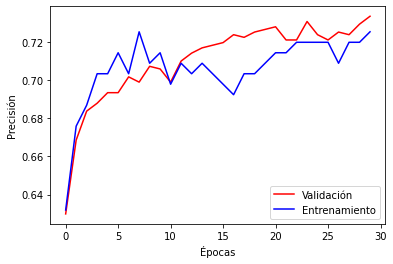

In [ ]:
plt.plot(range(30), history2.history["accuracy"], "r", label="Validación")
plt.plot(range(30), history2.history["val_accuracy"], "b", label = "Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.show()

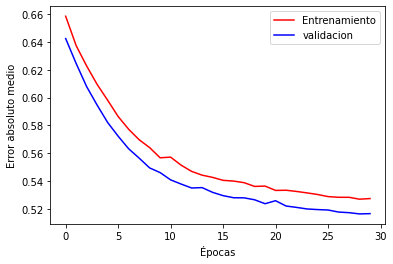

In [ ]:
#plot_loss_accuracy(history)
plt.plot(range(30), history2.history["loss"], "r", label="Entrenamiento")
plt.plot(range(30), history2.history["val_loss"], "b", label = "validacion")
plt.xlabel("Épocas")
plt.ylabel("Error absoluto medio")
plt.legend()
plt.show()

In [ ]:
y_pred2 =  (model2.predict(x_train2) > 0.5).astype("int32")
print(classification_report(y_train2, y_pred2))

29/29 [==============================] - 0s 942us/step
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       502
           1       0.72      0.65      0.68       404

    accuracy                           0.73       906
   macro avg       0.73      0.72      0.72       906
weighted avg       0.73      0.73      0.73       906



13/13 [==============================] - 0s 1ms/step


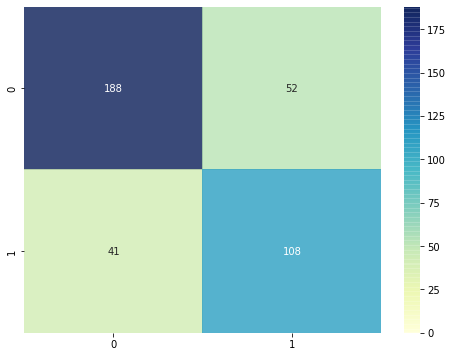

In [ ]:
plot_confusion_matrix(model2, x_test2, y_test2) 

Se predicen erróneamente 93 registros de 389 registros. 

## red Neuronal 3

In [ ]:
model3 = Sequential()
model3.add(Dense(64, input_shape=(x_train2.shape[1],), activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
#model3.add(Dense(12, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
model3.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
history3 = model3.fit(x=x_train2, y=y_train2, verbose=0, epochs=20, validation_split=0.2)

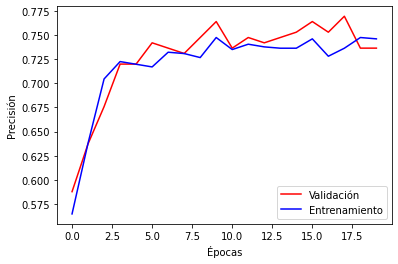

In [ ]:
plt.plot(range(20), history3.history["val_accuracy"], "r", label="Validación")
plt.plot(range(20), history3.history["accuracy"], "b", label = "Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.show()

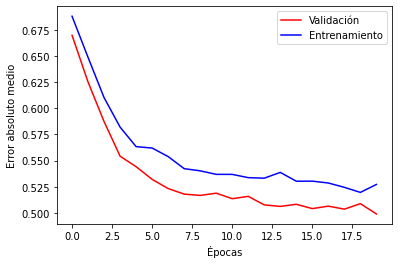

In [ ]:
#plot_loss_accuracy(history)
plt.plot(range(20), history3.history["val_loss"], "r", label="Validación")
plt.plot(range(20), history3.history["loss"], "b", label = "Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Error absoluto medio")
plt.legend()
plt.show()

In [ ]:
y_pred =  (model3.predict(x_test2) > 0.5).astype("int32")
print(classification_report(y_test2, y_pred))

13/13 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       240
           1       0.71      0.63      0.67       149

    accuracy                           0.76       389
   macro avg       0.75      0.74      0.74       389
weighted avg       0.76      0.76      0.76       389



13/13 [==============================] - 0s 1ms/step


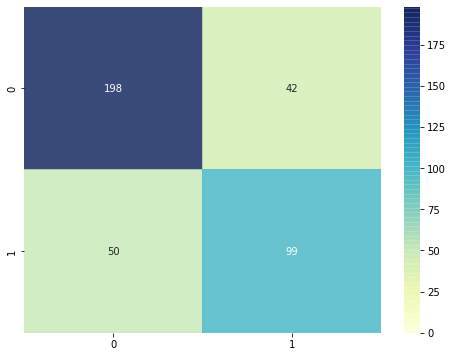

In [ ]:
plot_confusion_matrix(model3, x_test2, y_test2)  
#plt.show()

Se predicen erróneamente 92 registros de 389. 

## red Neuronal 3.1 CON VALIDACIÓN CRUZADA

In [13]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [ ]:
def create_model():
  model3_1 = Sequential()
  model3_1.add(Dense(64, input_shape=(dat_x_train.shape[1],), activation='relu'))
  model3_1.add(Dense(32, activation='relu'))
  model3_1.add(Dense(16, activation='relu'))
  #model3.add(Dense(12, activation='relu'))
  model3_1.add(Dense(1, activation='sigmoid'))
  model3_1.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
  return model3_1

In [ ]:
model3_1 = KerasClassifier(build_fn=create_model, epochs=20, verbose=0, batch_size=10)
#batch_size=10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)
#, random_state=seed

RESULTADO DE MODELO

In [ ]:
results = cross_val_score(model3_1, dat_x_train, dat_y_train, cv=kfold)
print(results)

[0.69884169 0.76447874 0.71428573 0.73359072 0.75675678]


In [ ]:
#SACANDO EL PROMEDIO
print(results.mean())

0.7335907340049743


Recordando el modelo de Regresión Logística, cuando usamos la función de StepAic, el modelo se redujo a 11 variables predictoras, vamos a realizar una prueba este modelo probando sólo con esas variables significativas:

In [30]:
train = pd.read_csv("train_norm.csv") 
train = train[["tasa_rep_carga","quintil_asig","ceneval_analitico","ceneval_matematico","prom_per_prev","tasa_rep_doc","complejidad_carga5","recursada","asigMuchas","semestre_Otoño","situacion_Irregular","carga_aprobada"]]

In [31]:
y_train_significativas = train.loc[:,train.columns == "carga_aprobada"]
x_train_significativas = train.loc[:, train.columns != 'carga_aprobada']

In [32]:
test = pd.read_csv("test_norm.csv") 
test = test[["tasa_rep_carga","quintil_asig","ceneval_analitico","ceneval_matematico","prom_per_prev","tasa_rep_doc","complejidad_carga5","recursada","asigMuchas","semestre_Otoño","situacion_Irregular","carga_aprobada"]]

In [33]:
y_test_significativas = test.loc[:,test.columns == "carga_aprobada"]
x_test_significativas = test.loc[:, test.columns != 'carga_aprobada']

Volviendo hacer el modelo. 

In [ ]:
def create_model2():
  model3_1 = Sequential()
  #Notese que ahora cambiamos las variables ingresadas a la capa
  model3_1.add(Dense(64, input_shape=(x_train_significativas.shape[1],), activation='relu'))
  model3_1.add(Dense(32, activation='relu'))
  model3_1.add(Dense(16, activation='relu'))
  #model3.add(Dense(12, activation='relu'))
  model3_1.add(Dense(1, activation='sigmoid'))
  model3_1.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
  return model3_1

In [ ]:
model3_2 = KerasClassifier(build_fn=create_model2, epochs=20, verbose=0, batch_size=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

RESULTADO DE MODELO CONSIDERANDO SÓLO LAS VARIABLES SIGNIFICATIVAS:

In [ ]:
results = cross_val_score(model3_2, x_train_significativas, y_train_significativas, cv=kfold)
print(results)

[0.71428573 0.72527474 0.69230771 0.69230771 0.80219781 0.70329672
 0.66666669 0.77777779 0.71111113 0.74444443]


In [ ]:
#SACANDO EL PROMEDIO
print(results.mean())

0.7229670464992524


CONCLUSIÓN: Vemos que la precisión no cambia mucho cuando consideramos sólo las variables significativas, pero al considerar este modelo esto podría hacer que sea más eficiente al agregar menos variables al momento de predecir. Por lo tanto, se escoge este modelo. 

Recordar que el modelo final de regresión Logística también tiene las mismas variables que este modelo.

## red Neuronal 4 

In [ ]:
from keras.optimizers import Adadelta, RMSprop,Adam

In [38]:
model4 = Sequential()
model4.add(Dense(64, input_shape=(x_train_significativas.shape[1],), activation='relu'))
#model4.add(Dense(32, activation='relu'))
model4.add(Dense(16, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

In [39]:
model4.compile(optimizer="Adam", loss='binary_crossentropy', metrics=["accuracy"])

In [40]:
history4 = model4.fit(x=x_train_significativas, y=y_train_significativas, verbose=0, epochs=20, validation_split=0.2)

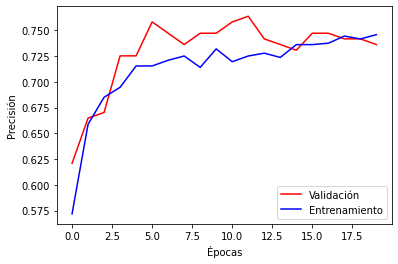

In [41]:
plt.plot(range(20), history4.history["val_accuracy"], "r", label="Validación")
plt.plot(range(20), history4.history["accuracy"], "b", label = "Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.show()

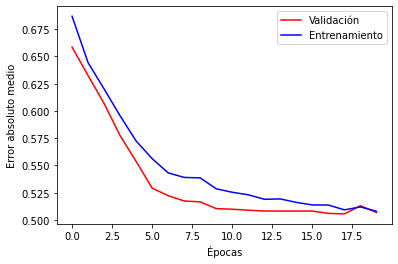

In [42]:
#plot_loss_accuracy(history)
plt.plot(range(20), history4.history["val_loss"], "r", label="Validación")
plt.plot(range(20), history4.history["loss"], "b", label = "Entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Error absoluto medio")
plt.legend()
plt.show()

In [43]:
y_pred =  (model4.predict(x_test_significativas) > 0.5).astype("int32")
print(classification_report(y_test2, y_pred))

13/13 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       240
           1       0.69      0.69      0.69       149

    accuracy                           0.76       389
   macro avg       0.75      0.75      0.75       389
weighted avg       0.76      0.76      0.76       389



13/13 [==============================] - 0s 2ms/step


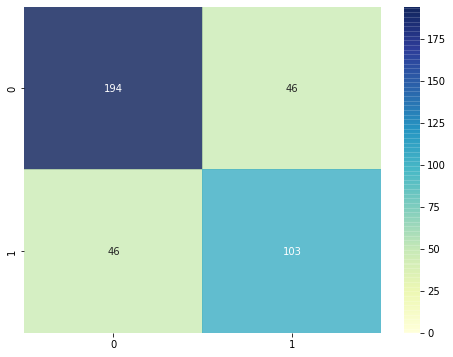

In [45]:
plot_confusion_matrix(model4, x_test_significativas, y_test_significativas)

Predecimos erróneamente 89 registros de 389.

Como podemos observar la mejor red neuronal ha sido la 4 y además comparando este modelo con el de regresión logística también es mejor.

## red Neuronal 4.1 Validación Cruzada

Modelo 4.1 contiene todas las variables.Es decir, las 16 variables normalizadas.

In [15]:
def create_model4_1():
  model4_1 = Sequential()
  model4_1.add(Dense(64, input_shape=(dat_x_train.shape[1],), activation='relu'))
  model4_1.add(Dense(16, activation='relu'))
  model4_1.add(Dense(1, activation='sigmoid'))
  model4_1.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
  return model4_1

In [16]:
model4_1 = KerasClassifier(build_fn=create_model4_1, epochs=20, verbose=0, batch_size=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [17]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [18]:
results = cross_val_score(model4_1, dat_x_train, dat_y_train, cv=kfold)
print(results)

[0.76923078 0.76923078 0.81538463 0.6769231  0.6769231  0.7364341
 0.75193799 0.75968993 0.77519381 0.7364341 ]


In [19]:
print(results.mean())

0.7467382311820984


Ahora probemos con las variables más significativas como en la red neuronal 3.1

In [23]:
dat_train = datos[["tasa_rep_carga","quintil_asig","ceneval_analitico","ceneval_matematico","prom_per_prev","tasa_rep_doc","complejidad_carga5","recursada","asigMuchas","semestre_Otoño","situacion_Irregular","carga_aprobada"]]
dat_y_train_significativas = datos.loc[:,datos.columns == "carga_aprobada"]
dat_x_train_significativas = datos.loc[:, datos.columns != 'carga_aprobada']

In [25]:
def create_model4_2():
  model4_2 = Sequential()
  #Notese que ahora las variables de entradas son las más significativas
  model4_2.add(Dense(64, input_shape=(dat_x_train_significativas.shape[1],), activation='relu'))
  model4_2.add(Dense(16, activation='relu'))
  model4_2.add(Dense(1, activation='sigmoid'))
  model4_2.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
  return model4_2

In [26]:
model4_2 = KerasClassifier(build_fn=create_model4_2, epochs=20, verbose=0, batch_size=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [27]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [28]:
results = cross_val_score(model4_2, dat_x_train_significativas, dat_y_train_significativas, cv=kfold)
print(results)

[0.76153845 0.73846155 0.73076922 0.75384617 0.73076922 0.75193799
 0.72868216 0.75968993 0.74418604 0.70542634]


In [29]:
print(results.mean())

0.7405307054519653


CONCLUSIÓN: La red Neuronal 4 y 4.1 fueron las mejores en presición y F1-SCORE, por lo tanto usaremos este modelo. Se decide usar el modelo sólo con las variables más significativas ya que al ingresar las 16 variables la precisión es prácticamente la misma que si sólo están las más importantes. 

## Exportando

In [46]:
from keras.models import load_model 
load_model = model4.save('Neural_Networks.h5')
#model_final = load_model('model.h5')

In [47]:
#CARGANDO EL MODELO
model_final = keras.models.load_model("Neural_Networks.h5")

In [49]:
#PREDICIENDO CON EL MODELO
(model_final.predict(x_train_significativas) > 0.5).astype("int32")

29/29 [==============================] - 0s 4ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
    